pytorch fashionmnist 数据集 神经网络搭建和训练

In [1]:
# 导入必要依赖
import torch
import torch.nn as nn
from torch import optim as optim
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torchvision.transforms.v2 import ToTensor, Compose
from torch.utils.data import DataLoader # 数据加载器
import matplotlib.pyplot as plt
import numpy as np


In [35]:
# 定义超参数
LR = 0.001 # 学习率
epochs = 50 # 学习轮数
BATCH_SIZE = 32

In [50]:
# 加载数据
train_data = FashionMNIST(
        root='../dataset/FashionMNIST',
        train=True, # 是否下载训练数据库集 true -> 下载训练集 false -> 下载测试集
        download=True, # 是否下载，true -> 下载数据，如果以及下载了，不会再下载
        transform=ToTensor()
        )
test_data = FashionMNIST(
        root='../dataset/FashionMNIST',
        train=False, # 是否下载训练数据库集 true -> 下载训练集 false -> 下载测试集
        download=True, # 是否下载，true -> 下载数据，如果以及下载了，不会再下载
        transform=ToTensor()
    )

D:\Anaconda3-2020\anaconda\envs\pytorch_study\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [37]:
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True) # shuffle=True 随机打乱数据集
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True)


In [38]:
# 定义模型
model = nn.Sequential(
    # 第一层隐藏层
    nn.Linear(in_features=784,out_features=64), # 784个特征 128 个神经元
    nn.ReLU(),
    # 输出层
    nn.Linear(in_features=64,out_features=10) # 128个特征 10个输出值
)

In [39]:
# 定义损失函数
loss_fun = nn.CrossEntropyLoss()

In [40]:
# 定义优化器
optimizer = optim.SGD(model.parameters(), lr=LR, momentum=0.9)

In [41]:
# 模型训练
losses = []
for epoch in range(epochs):
    # 提取训练数据
    for data, target in train_loader:
        # 向前运算
        output = model(data.reshape(-1, 784))
        # 计算损失
        loss = loss_fun(output, target)
        # 反向传播
        optimizer.zero_grad() # 所有参数梯度清零
        loss.backward() # 反向传播计算梯度
        optimizer.step() # 更新参数
    losses.append(loss.item())
    print(f'epoch {epoch}, loss {loss.item():.4f}')

epoch 0, loss 0.5938
epoch 1, loss 0.3504
epoch 2, loss 0.4434
epoch 3, loss 0.5674
epoch 4, loss 0.3389
epoch 5, loss 0.5024
epoch 6, loss 0.5828
epoch 7, loss 0.4533
epoch 8, loss 0.3639
epoch 9, loss 0.5053
epoch 10, loss 0.3906
epoch 11, loss 0.3143
epoch 12, loss 0.4595
epoch 13, loss 0.3071
epoch 14, loss 0.2977
epoch 15, loss 0.4281
epoch 16, loss 0.4900
epoch 17, loss 0.5096
epoch 18, loss 0.3298
epoch 19, loss 0.2165
epoch 20, loss 0.2155
epoch 21, loss 0.2715
epoch 22, loss 0.2383
epoch 23, loss 0.5162
epoch 24, loss 0.2923
epoch 25, loss 0.1998
epoch 26, loss 0.2659
epoch 27, loss 0.6193
epoch 28, loss 0.2127
epoch 29, loss 0.6259
epoch 30, loss 0.3850
epoch 31, loss 0.2613
epoch 32, loss 0.2437
epoch 33, loss 0.3955
epoch 34, loss 0.1204
epoch 35, loss 0.2351
epoch 36, loss 0.4115
epoch 37, loss 0.3603
epoch 38, loss 0.2916
epoch 39, loss 0.3918
epoch 40, loss 0.1306
epoch 41, loss 0.1400
epoch 42, loss 0.3051
epoch 43, loss 0.1942
epoch 44, loss 0.1816
epoch 45, loss 0.101

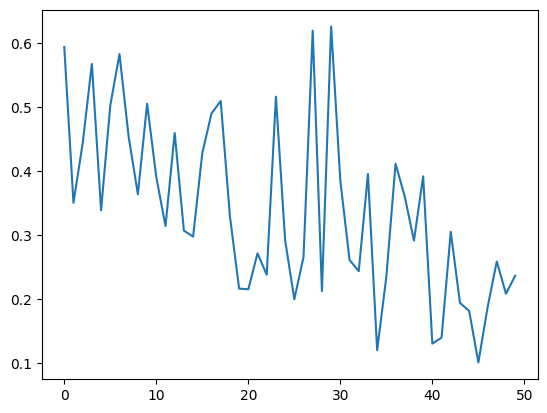

In [42]:
plot_x = np.arange(0, epochs, 1)
plt.plot(plot_x, losses)
plt.show()

In [43]:
# 测试
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data.reshape(-1, 784))
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += predicted.eq(target.data).sum().item()
    print(f'accuracy {100 * correct / total:.2f}%')

accuracy 87.20%


In [147]:
predicted

tensor([5, 8, 4, 9, 2, 7, 4, 9, 3, 1, 0, 0, 1, 9, 3, 2])

In [148]:
target

tensor([5, 4, 2, 9, 2, 7, 6, 9, 3, 1, 0, 6, 1, 9, 2, 2])

In [149]:
(predicted == target).int().sum().item()

11